# Introduction to neural network classification with tensorflow

In this notebook we are going to learn how to write neural network for classification problems. A classification is when you try to classify something as one thing or another.
A few types of classification problems:
* Binary classification.
* Multiclass classification.
* Multilabel classification.

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles

x,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state =42)

In [2]:
# Check out the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

# Lets visualize data

In [4]:
import pandas as pd 
circles = pd.DataFrame({"x0":x[:,0],"x1":x[:,1],"labels":y})
circles

,x0,x1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


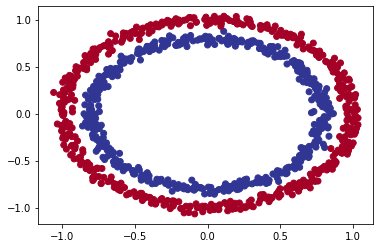

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

# Input and Output shape

In [6]:
# Check the shape of our features and labels
x.shape,y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we are working with
len(x),len(y)

(1000, 1000)

In [8]:
# View the first examples of features and labels
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modeling 

In [9]:
import tensorflow as tf
import sklearn
tf.random.set_seed(42)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
x_train,y_train

(array([[ 1.01676984, -0.19640844],
        [-0.78996953, -0.71305302],
        [ 0.09049534,  0.92881731],
        ...,
        [-0.96657519, -0.22562157],
        [ 0.7509957 , -0.60611761],
        [ 0.19007538,  0.71771449]]),
 array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 

In [12]:

# Creaqting a neural network model that fits with our data
model_a = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
  
])

model_a.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics =["accuracy"]
)
model_a.fit(x_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 3s 2ms/step - loss: 1.2060 - accuracy: 0.4938
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7264 - accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.4900
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.4950
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.4975
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7010 - accuracy: 0.4938
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.4888
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4888
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5025
Epoch 11/

In [13]:
model_a.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4600


[0.6947048306465149, 0.46000000834465027]

In [14]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1])

# Improving our model

In [15]:
tf.random.set_seed(42)
model_b = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_b.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)
model_b.fit(x_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 6.4630 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 7.5582 - accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 7.5582 - accuracy: 0.5100
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 7.5582 - accuracy: 0.5100
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 7.5582 - accuracy: 0.5100
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 7.5582 - accuracy: 0.5100
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 7.5582 - accuracy: 0.5100
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 7.5582 - accuracy: 0.5100
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 7.5582 - accuracy: 0.5100
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 7.5582 - accuracy: 0.5100
Epoch 11/

In [16]:
model_b.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 8.3295 - accuracy: 0.4600


[8.329471588134766, 0.46000000834465027]

In [17]:
prediction=model_b.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [18]:
prediction.shape,x_test.shape


((200, 1), (200, 2))

In [19]:
import numpy as np

In [20]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [21]:
prediction.shape

(200, 1)

In [22]:
# To visualize our model predictiion lets make a function 
# Take in features and labels x and y
# Create a mesh grid of different x values
# make the prediction against thew meshgrid
# plot the predictions as well as a line between zones

In [23]:
import numpy as np
def plot_decision_boundary(model,x,y):
  "plots the decision boundry created by a model prediction on x"
  x_min,x_max = x[:,0].min()-0.1,x[:,0].max()+0.1
  y_min,y_max = x[:,1].min()-0.1,x[:,1].max()+0.1 

  xx,yy =np.meshgrid(np.linspace(x_min,x_max,100),
                   np.linspace(y_min,y_max,100))
  x_in = np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_in)

  if len(y_pred[0])>1:
       y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)

  else:
      y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 0s 1ms/step


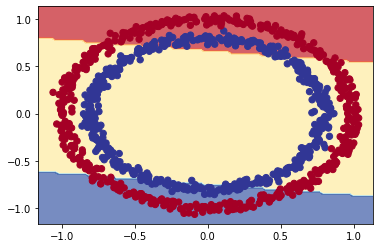

In [24]:
plot_decision_boundary(model_b,x,y);

In [25]:
# The model is learning a linear pattern

In [26]:
tf.random.set_seed(42)
# We are goinig to make changes in the model 
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling a model 
model_c.compile(
    loss = tf.keras.losses.MAE,
    optimizer= tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)


In [27]:
# Lets see if our model works for a regression problem
tf.random.set_seed(42)

# Create some regression data
x_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)
x_regression,y_regression

# lets soplit our trining and testing data into tyrain and test

x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit our moodel to the  regression data

model_c.fit(tf.expand_dims(x_reg_train,axis=1),tf.expand_dims(y_reg_train,axis=1),epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9375 - mae: 45.9375
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 5ms/step


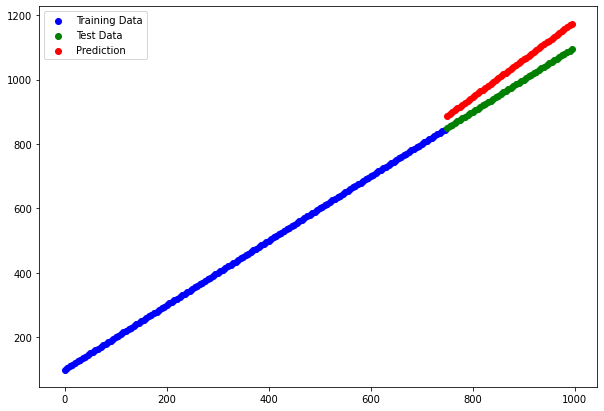

In [28]:
y_reg_preds = model_c.predict(x_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(x_reg_train,y_reg_train,c="b",label="Training Data")
plt.scatter(x_reg_test,y_reg_test,c="g",label="Test Data")
plt.scatter(x_reg_test,y_reg_preds,c="r",label="Prediction")
plt.legend();

## The missing piece: Non Linearity

In [29]:
# Set the random seed
tf.random.set_seed(42)
model_d = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation= tf.keras.activations.linear)
]
)
model_d.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_d.fit(x,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/100
32/32 [=

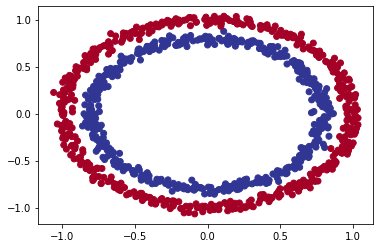

In [30]:
# Check out our data
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step


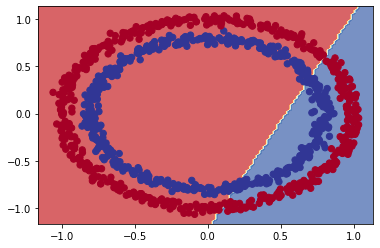

In [31]:
# Check the decission boundary
plot_decision_boundary(model_d,x,y)

let try to build a neural network with a non linear activation

In [32]:
tf.random.set_seed(42)

model_e = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
model_e.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history = model_e.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

In [33]:
tf.random.set_seed(42)

model_f = tf.keras.Sequential([
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(1)
])
model_f.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
history = model_f.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [34]:
model_f.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step


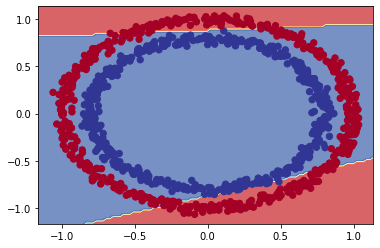

In [35]:
# How does our models predictions look like
plot_decision_boundary(model_f,x,y)

In [36]:
model_g = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_g.compile(
    loss ="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"]
)

model_g.fit(tf.expand_dims(x,axis=1),tf.expand_dims(y,axis=1),epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6930 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5550
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5060
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5040
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5090
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5050
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.5110
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.5120
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5130
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6835 - accuracy: 0.5110
Epoch 11/

In [37]:
model_g.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9910


[0.19576922059059143, 0.9909999966621399]

313/313 [==============================] - 0s 1ms/step


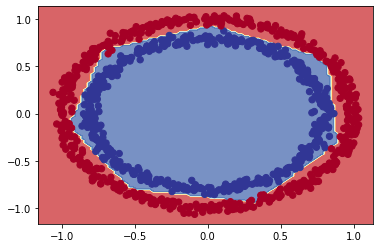

In [38]:
# Lets Visualize
plot_decision_boundary(model_g,x,y)

In [39]:
model_h = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_h.compile(
    loss ="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ["accuracy"]
)

history = model_h.fit(tf.expand_dims(x_train,axis=1),tf.expand_dims(y_train,axis=1),epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4825
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.4963
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5175
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5138
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5213
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5288
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.5300
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.5525
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.5925
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.5950
Epoch 11/25
25/25 [

In [40]:
model_h.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5521 - accuracy: 0.7000


[0.5521238446235657, 0.699999988079071]

313/313 [==============================] - 0s 1ms/step


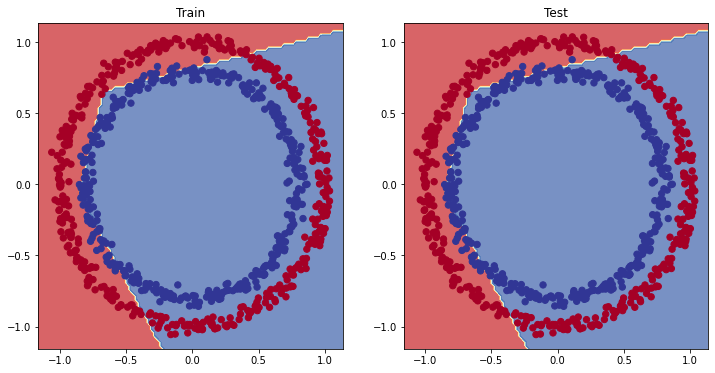

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_h,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_h,x_train,y_train)
plt.show();

In [42]:
# Create a toy tensor (similar to the data we pass into )
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

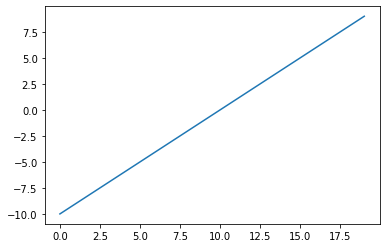

In [43]:
# Visualizing Tensor
plt.plot(A)

In [44]:
# Lets start by replicate sigmoid
def sigmoid(x):
  return(1/(1+tf.exp(-x)))
# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

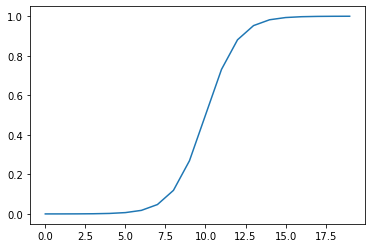

In [45]:
# Plot simoid of A
plt.plot(sigmoid(A))

In [46]:
# Lets recreate the relu function
def relu(x):
  return (tf.maximum(0,x))
# Pass Tensor to relu

relu(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

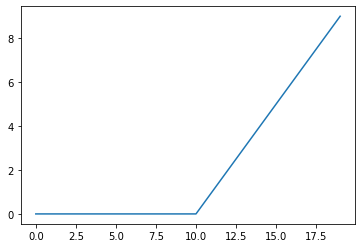

In [47]:
# Plot Relu modified tensor
plt.plot(relu(A))

In [48]:
# Lets try linear activation function 
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

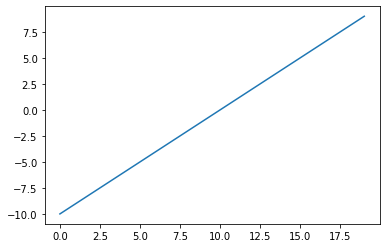

In [49]:
# Does the linear activation function changes any thing

plt.plot(tf.keras.activations.linear(A))

# Plot the loss Curve

In [50]:
history.history

{'loss': [0.6956194043159485,
  0.6899242997169495,
  0.6853094696998596,
  0.6831483244895935,
  0.6808043718338013,
  0.6780673265457153,
  0.6737727522850037,
  0.6668274402618408,
  0.6528421640396118,
  0.6418519020080566,
  0.633922815322876,
  0.6227478384971619,
  0.6075904965400696,
  0.5952191948890686,
  0.5888396501541138,
  0.5789908766746521,
  0.5695107579231262,
  0.5599679350852966,
  0.5537450909614563,
  0.5490726232528687,
  0.5476700067520142,
  0.5480430126190186,
  0.5357646942138672,
  0.536065399646759,
  0.5391846299171448],
 'accuracy': [0.48249998688697815,
  0.4962500035762787,
  0.5174999833106995,
  0.5137500166893005,
  0.5212500095367432,
  0.5287500023841858,
  0.5299999713897705,
  0.5525000095367432,
  0.5924999713897705,
  0.5950000286102295,
  0.625,
  0.6200000047683716,
  0.6424999833106995,
  0.6587499976158142,
  0.675000011920929,
  0.6587499976158142,
  0.6725000143051147,
  0.6949999928474426,
  0.6974999904632568,
  0.7012500166893005,
  0.

Text(0.5, 1.0, 'Model_h loss curve')

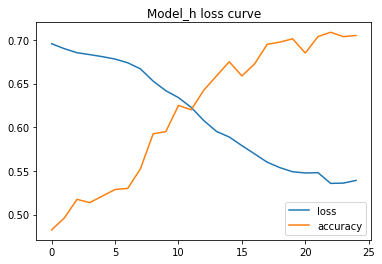

In [51]:
pd.DataFrame(history.history).plot()
plt.title("Model_h loss curve")

In [52]:
model_i = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_i.compile(
    loss ="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ["accuracy"]
)
# Creating callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 *10**(epoch/20))

history_i = model_i.fit(tf.expand_dims(x_train,axis=1),tf.expand_dims(y_train,axis=1),epochs=100,callbacks=[lr_scheduler])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.7415 - accuracy: 0.4875 - lr: 1.0000e-06
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7415 - accuracy: 0.4863 - lr: 1.1220e-06
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7415 - accuracy: 0.4863 - lr: 1.2589e-06
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7414 - accuracy: 0.4863 - lr: 1.4125e-06
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7414 - accuracy: 0.4863 - lr: 1.5849e-06
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7414 - accuracy: 0.4863 - lr: 1.7783e-06
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7413 - accuracy: 0.4863 - lr: 1.9953e-06
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7413 - accuracy: 0.4863 - lr: 2.2387e-06
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7413 - ac

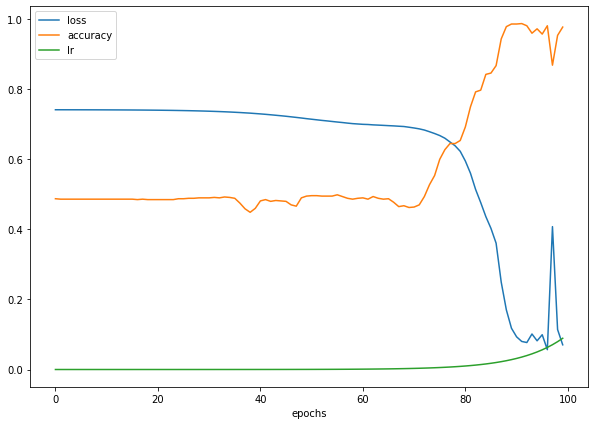

In [53]:
# Lets check out the history
pd.DataFrame(history_i.history).plot(figsize=(10,7),xlabel="epochs");

In [54]:
# Plot the learning rate vs loss
lrs = 1e-6 *(10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-06, 1.12201845e-06, 1.25892541e-06, 1.41253754e-06,
       1.58489319e-06, 1.77827941e-06, 1.99526231e-06, 2.23872114e-06,
       2.51188643e-06, 2.81838293e-06, 3.16227766e-06, 3.54813389e-06,
       3.98107171e-06, 4.46683592e-06, 5.01187234e-06, 5.62341325e-06,
       6.30957344e-06, 7.07945784e-06, 7.94328235e-06, 8.91250938e-06,
       1.00000000e-05, 1.12201845e-05, 1.25892541e-05, 1.41253754e-05,
       1.58489319e-05, 1.77827941e-05, 1.99526231e-05, 2.23872114e-05,
       2.51188643e-05, 2.81838293e-05, 3.16227766e-05, 3.54813389e-05,
       3.98107171e-05, 4.46683592e-05, 5.01187234e-05, 5.62341325e-05,
       6.30957344e-05, 7.07945784e-05, 7.94328235e-05, 8.91250938e-05,
       1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.4668

Text(0.5, 1.0, 'learning rate vs loss')

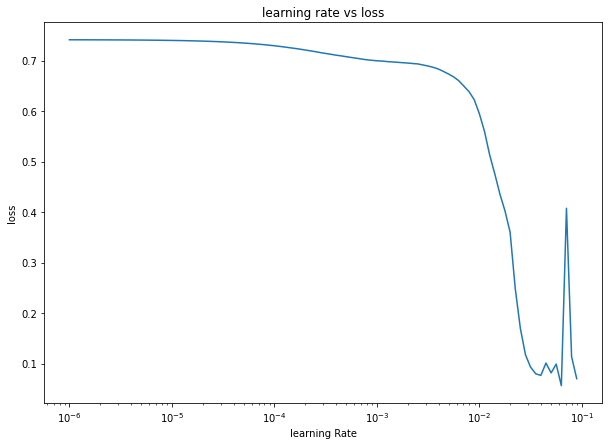

In [55]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_i.history["loss"])
plt.xlabel("learning Rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [56]:
model_j = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_j.compile(
    loss ="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr=0.02),
    metrics = ["accuracy"]
)

history_j = model_j.fit(tf.expand_dims(x_train,axis=1),tf.expand_dims(y_train,axis=1),epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6851 - accuracy: 0.5150
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.5587
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6551 - accuracy: 0.6300
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.6938
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.7862
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.9038
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.9475
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9887
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.9887
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.9950
Epoch 11/20
25/25 [===========

In [57]:
model_j.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9800


[0.045243434607982635, 0.9800000190734863]

In [58]:
model_i.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9850


[0.0433155782520771, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step


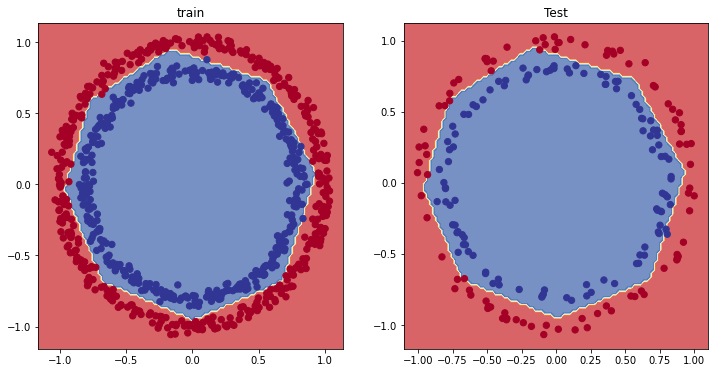

In [59]:
# Plot the decision boundry
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_j,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_j,x_test,y_test)
plt.show();

## More classification evaluation methods

Along side model visualization there are other model evaluation metrics that you should be femiliar with

* Accuracy
* Precision
* Recall
* F1 score
* confusion metrics

In [60]:
# Chech the accuracy of our model 
loss, accuracy = model_j.evaluate(x_test,y_test)
print (f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9800
Model loss on the test set:0.045243434607982635
Model accuracy on the test set 98.00%


How about a confusion metrics

In [61]:
# Create a confusion metrics

#from sklearn.metrics import confusion_matrix

y_preds = model_j.predict(x_test)

#confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 2ms/step


oop looks like our prediction array has come in as prediction probability array

In [62]:
# Convert our prediction probabilities to 0 or 1
y_preds=tf.round(y_preds)

In [63]:
# Creating confusion metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_preds)

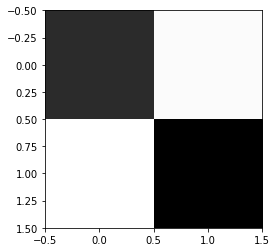

In [64]:
plt.imshow(cm,cmap="binary",);

In [65]:
cm

array([[ 89,   3],
       [  1, 107]])

In [66]:
import seaborn as sn


In [67]:
l=[]
for i in cm:
  for j in i:
    l.append(f"{j/100}({j}%)")


In [68]:
l=np.array(l).reshape(2,2)

In [69]:
cm.shape,l.shape
l

array([['0.89(89%)', '0.03(3%)'],
       ['0.01(1%)', '1.07(107%)']], dtype='<U10')

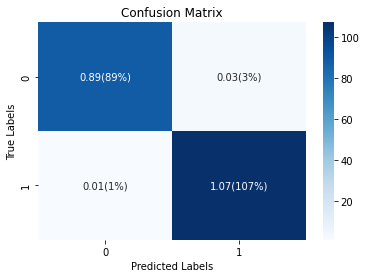

In [70]:
s = sn.heatmap(cm,cbar=True,annot=l,fmt="",cmap="Blues",);
s.set_xlabel("Predicted Labels")
s.set_ylabel("True Labels")
s.set_title("Confusion Matrix");

how about we pretify our confusion metrics

classification_report,
# Working with a larger example (multiclass classification)

when you have more than two classes as an option, its multiclass classification_report
* This means if you have 3 different classes, it's multiclass classification
* It also means if you have different classes its multiclass


In [71]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [72]:
# Show the first training sample
print(f"Training sample : \n{train_data[0]}\n")
print(f"Training labels :\n{train_labels[0]}\n")

Training sample : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [73]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

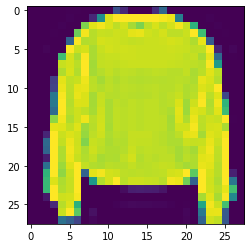

In [74]:
# Plot a single sample
plt.imshow(train_data[7]);

In [75]:
#Check sample labels
train_labels[7]

2

In [76]:
# Create a small list so that we can index onto our training data
class_names = ['T-shirts/top',"Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Dress')

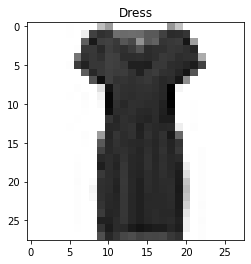

In [77]:
# Plot an example image and its label
index_choise = 20
plt.imshow(train_data[index_choise],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_choise]])

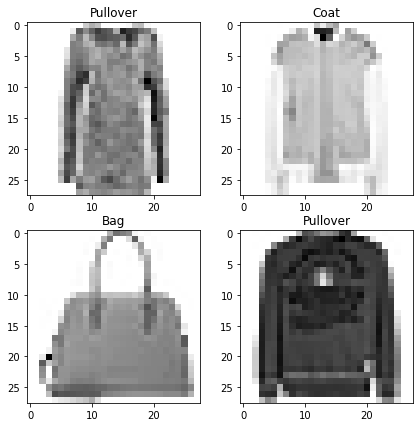

In [78]:
# Plot multiple random images 
import random
plt.figure(figsize=(7,7))
for i in range (4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis=False

## Building a multiclass classification model

In [79]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Our input needs to be flattened
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_11.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

non_norm_history = model_11.fit(train_data,train_labels,epochs=10,validation_data= (test_data,test_labels)) 

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

If your labels are one hot encoded use Categorical cross entropy and if it isnt use sparse categorical cross entropy

Neral network prefer to bwe scaled between 0 and 1 but our data is between 0 and 255

In [80]:
# We  can get our data between 0 and 1 by dividing with max value
train_data_norm = train_data/255.0
test_data_norm = test_data / 255.0

# Check the maximum and minimum of normalized training and testing data
train_data_norm.min(),train_data_norm.max()
test_data_norm.min(),test_data_norm.max()

(0.0, 1.0)

In [81]:
tf.random.set_seed(42)
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_12.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

norm_history = model_12.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Note Neural Networks tend to prefer data in numerical form as well as scaled/normalizd(nummber between 0 and 1)

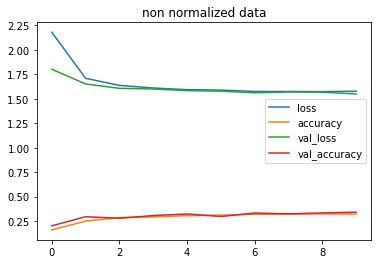

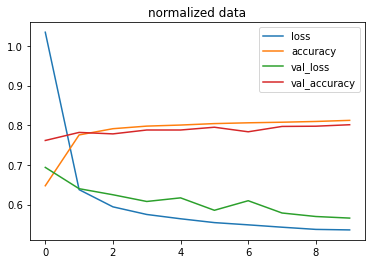

In [82]:
import pandas as pd 
# Plot the non normalized data curves
pd.DataFrame(non_norm_history.history).plot(title="non normalized data")

# Plot normalized data 
pd.DataFrame(norm_history.history).plot(title="normalized data")

Note the same model with even slightly different data can produe dramatically different results so if you are making comparison between models make sure to compare them on same criteria

In [83]:
tf.random.set_seed(42)
model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_13.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))

norm_history_13 = model_13.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels),callbacks = [lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 5s

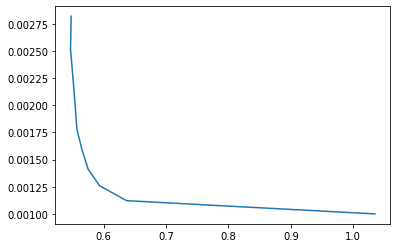

In [84]:
b=pd.DataFrame(norm_history_13.history["loss"],columns=["loss"])
b["lr"]=np.array(norm_history_13.history["lr"])
plt.plot(b["loss"],b["lr"])

So from graph 0.001 is the ideal learning rate

In [85]:
# Lets refit a model with ideal learning rate
tf.random.set_seed(42)
model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_14.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

norm_history_14 = model_14.fit(train_data_norm,train_labels,epochs=20,validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our multiclass classification model

In [105]:
tf.constant(test_labels),tf.round(y_preds)

(<tf.Tensor: shape=(10000,), dtype=uint8, numpy=array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)>,
 <tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 3, 1, 5])>)

In [108]:
# Create a confusion metrics
import itertools

figsize = (10, 10)
def make_confusion_matrix(y_test,y_preds,classes=None,figsize=(10,10),text_size =15):
    # Create the confusion matrix
    cm = confusion_matrix(tf.constant(y_test), tf.round(y_preds))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)


    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [87]:
class_names

['T-shirts/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [88]:
# make some predictions mith our model

y_probs = model_14.predict(test_data/test_data.max())
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[8.5630038e-11, 3.5361923e-13, 2.6633796e-05, 4.6356057e-08,
        5.0949642e-05, 9.6118979e-02, 8.1778097e-08, 9.1868639e-02,
        4.0605105e-03, 8.0787414e-01],
       [3.4278555e-06, 1.2899412e-16, 9.5989150e-01, 2.0516218e-07,
        1.5329195e-02, 2.4532527e-13, 2.4142891e-02, 1.1383710e-28,
        6.3271867e-04, 4.4789640e-08],
       [6.1063060e-05, 9.9657673e-01, 4.3867310e-08, 3.3405882e-03,
        1.3249612e-05, 1.4383545e-21, 8.2791003e-06, 7.3238853e-18,
        5.4811920e-08, 4.9225709e-14],
       [7.5031370e-05, 9.9053699e-01, 4.2528902e-07, 9.2231650e-03,
        1.3623273e-04, 1.8276510e-18, 2.6808373e-05, 4.8125292e-14,
        1.4521634e-06, 2.2211717e-11],
       [7.2189897e-02, 1.5495709e-06, 2.5566906e-01, 1.0363110e-02,
        4.3541320e-02, 1.1069409e-13, 6.1693019e-01, 6.7544158e-23,
        1.3049176e-03, 1.2140382e-09]], dtype=float32)

Make the predictions on same kind of data as the training data

In [89]:
y_preds = y_probs.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 3, 1, 5])

In [90]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

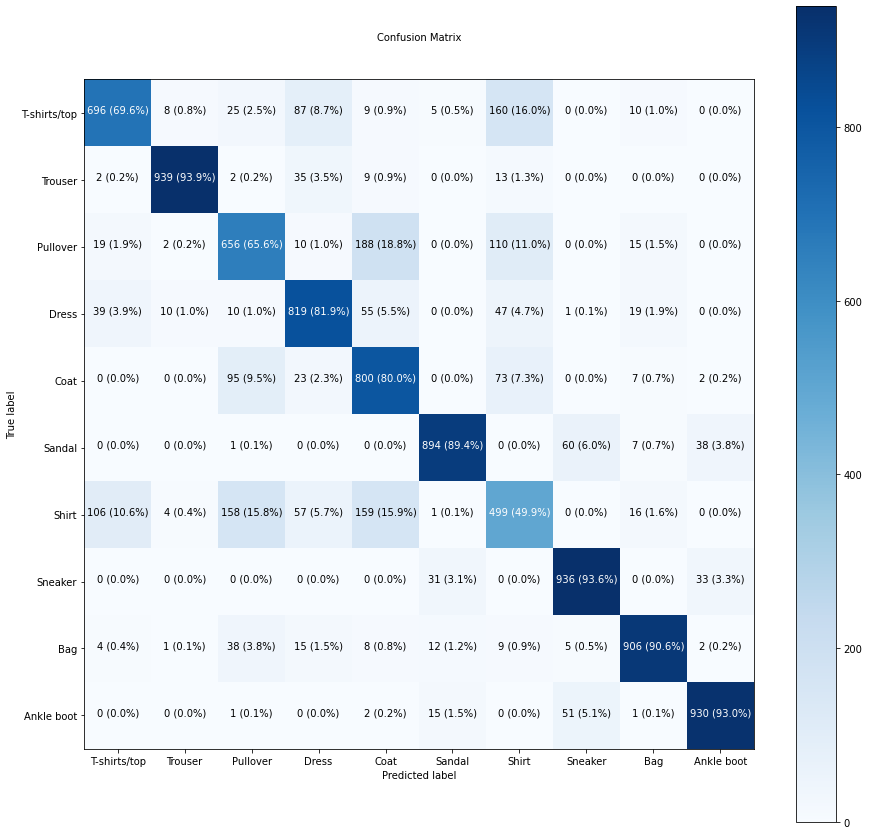

In [110]:
# Make a prettier confusion matrix
make_confusion_matrix(y_test = test_labels,
                      y_preds = y_preds,
                      classes = class_names,
                      figsize = (15,15),
                      text_size=10)

In [115]:
import random

def plot_random_image(model,images,true_labels,classes):
  """
  picks a random image plots it and labels it with a prediction and truth label
  """
  i = random.randint(0,len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  # Change the color of labels
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  # Add xlabels information
  plt.xlabel("pred{} {:2.0f}% (True: {})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),true_label),color=color) # set green or red if the prediction is right or wrong
  

1/1 [==============================] - 0s 15ms/step


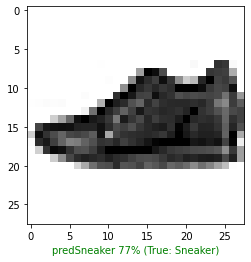

In [138]:
# Check out a random image and its prediction
plot_random_image(model=model_14,images=test_data_norm,true_labels=test_labels,classes=class_names)

## What pattern is our model learning

In [139]:
# Find the layers of our most recent model
model_14.layers

In [140]:
model_14.layers[1]

In [141]:
# Get the patterns of a layer in our network
weights,biases = model_14.layers[1].get_weights()

# Shape
weights,weights.shape

(array([[ 0.715027  , -0.06077112, -0.9976308 , -1.0484312 ],
        [ 0.27732143, -0.4715541 , -0.5291646 ,  0.02329262],
        [ 0.7752432 ,  0.5402756 , -1.128857  , -0.7426152 ],
        ...,
        [-0.39453375,  0.47628623, -0.22641547,  0.25505966],
        [-0.40515727,  0.6181007 ,  0.23928417, -0.503876  ],
        [ 0.23884544,  0.11606897, -0.1213136 ,  0.04352434]],
       dtype=float32), (784, 4))

In [142]:
# Now lets check out the biases vector

biases,biases.shape

(array([ 2.4485679e-02, -6.1455613e-04, -2.7230152e-01,  8.1124908e-01],
       dtype=float32), (4,))

Every neuron has a biases vector. Each of these is paired with a weights matrix.
The bias vector get initialized as zeros (at least in case of a tensorflow dense layer).
the bias vector dictates how much the patterns within the corresponding weights should influence the next layer

In [143]:
model_14.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 4)                 3140      
                                                                 
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


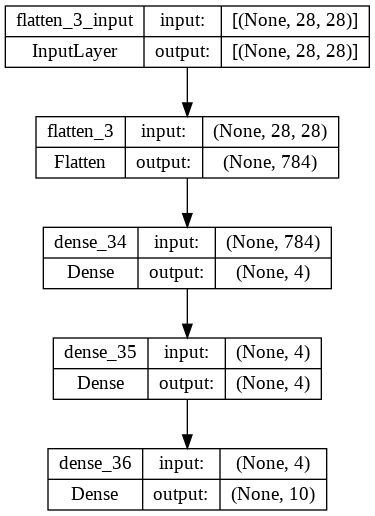

In [144]:
from tensorflow.keras.utils import plot_model
plot_model(model_14,show_shapes=True)